In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_multiple_experiments_grid(aux_dict: dict):
    n = len(aux_dict)
    n_cols = 2
    n_rows = (n + 1) // 2

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows), sharey=True)
    axs = axs.flatten()

    for ax, (name, path) in zip(axs, aux_dict.items()):
        df = pd.read_csv(path)
        df = df[df["in_degree"] > 0]

        f1 = df.query("fit_peak_value > 0 and fit_peak_value <= 10")
        f2 = df.query("fit_peak_value > 10 and fit_peak_value <= 100")
        f3 = df.query("fit_peak_value > 100 and fit_peak_value <= 1000")
        f4 = df.query("fit_peak_value > 1000 and fit_peak_value <= 10000")
        f5 = df.query("fit_peak_value > 10000 and fit_peak_value <= 100000")
        f6 = df.query("fit_peak_value > 100000 and fit_peak_value <= 1000000")

        dfs    = [f1, f2, f3, f4, f5, f6]
        labels = ['0-10', '10-100', '100-1k', '1k-10k', '10k-100k', '100k-1M']
        positions = np.arange(len(dfs)) * 2
        width     = 0.6
        medianprops = dict(color='black', linewidth=2.5)

        for i, df_part in enumerate(dfs):
            x = positions[i]
            agent_vals = df_part.loc[df_part['type']=='agent', 'in_degree']
            seed_vals  = df_part.loc[df_part['type']=='seed',  'in_degree']

            agent_vals = agent_vals[agent_vals > 0]
            seed_vals  = seed_vals[seed_vals > 0]
            agent_vals = np.log10(agent_vals)
            seed_vals  = np.log10(seed_vals)

            ax.boxplot(
                agent_vals,
                positions=[x - width/2],
                widths=width,
                notch=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightblue',  edgecolor='black'),
                medianprops=medianprops
            )

            ax.boxplot(
                seed_vals,
                positions=[x + width/2],
                widths=width,
                notch=False,
                patch_artist=True,
                boxprops=dict(facecolor='lightcoral', edgecolor='black'),
                medianprops=medianprops
            )

        ax.set_xticks(positions)
        ax.set_xticklabels(labels, rotation=45)
        ax.set_xlabel('Tag2')
        ax.set_ylabel('log10(in_degree)')
        ax.set_title(name)

    for ax in axs[n:]:
        ax.remove()

    legend_elems = [
        Patch(facecolor='lightblue',  edgecolor='black', label='agent'),
        Patch(facecolor='lightcoral', edgecolor='black', label='seed')
    ]
    axs[0].legend(handles=legend_elems, loc='upper left')
    plt.tight_layout()
    plt.show()

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low

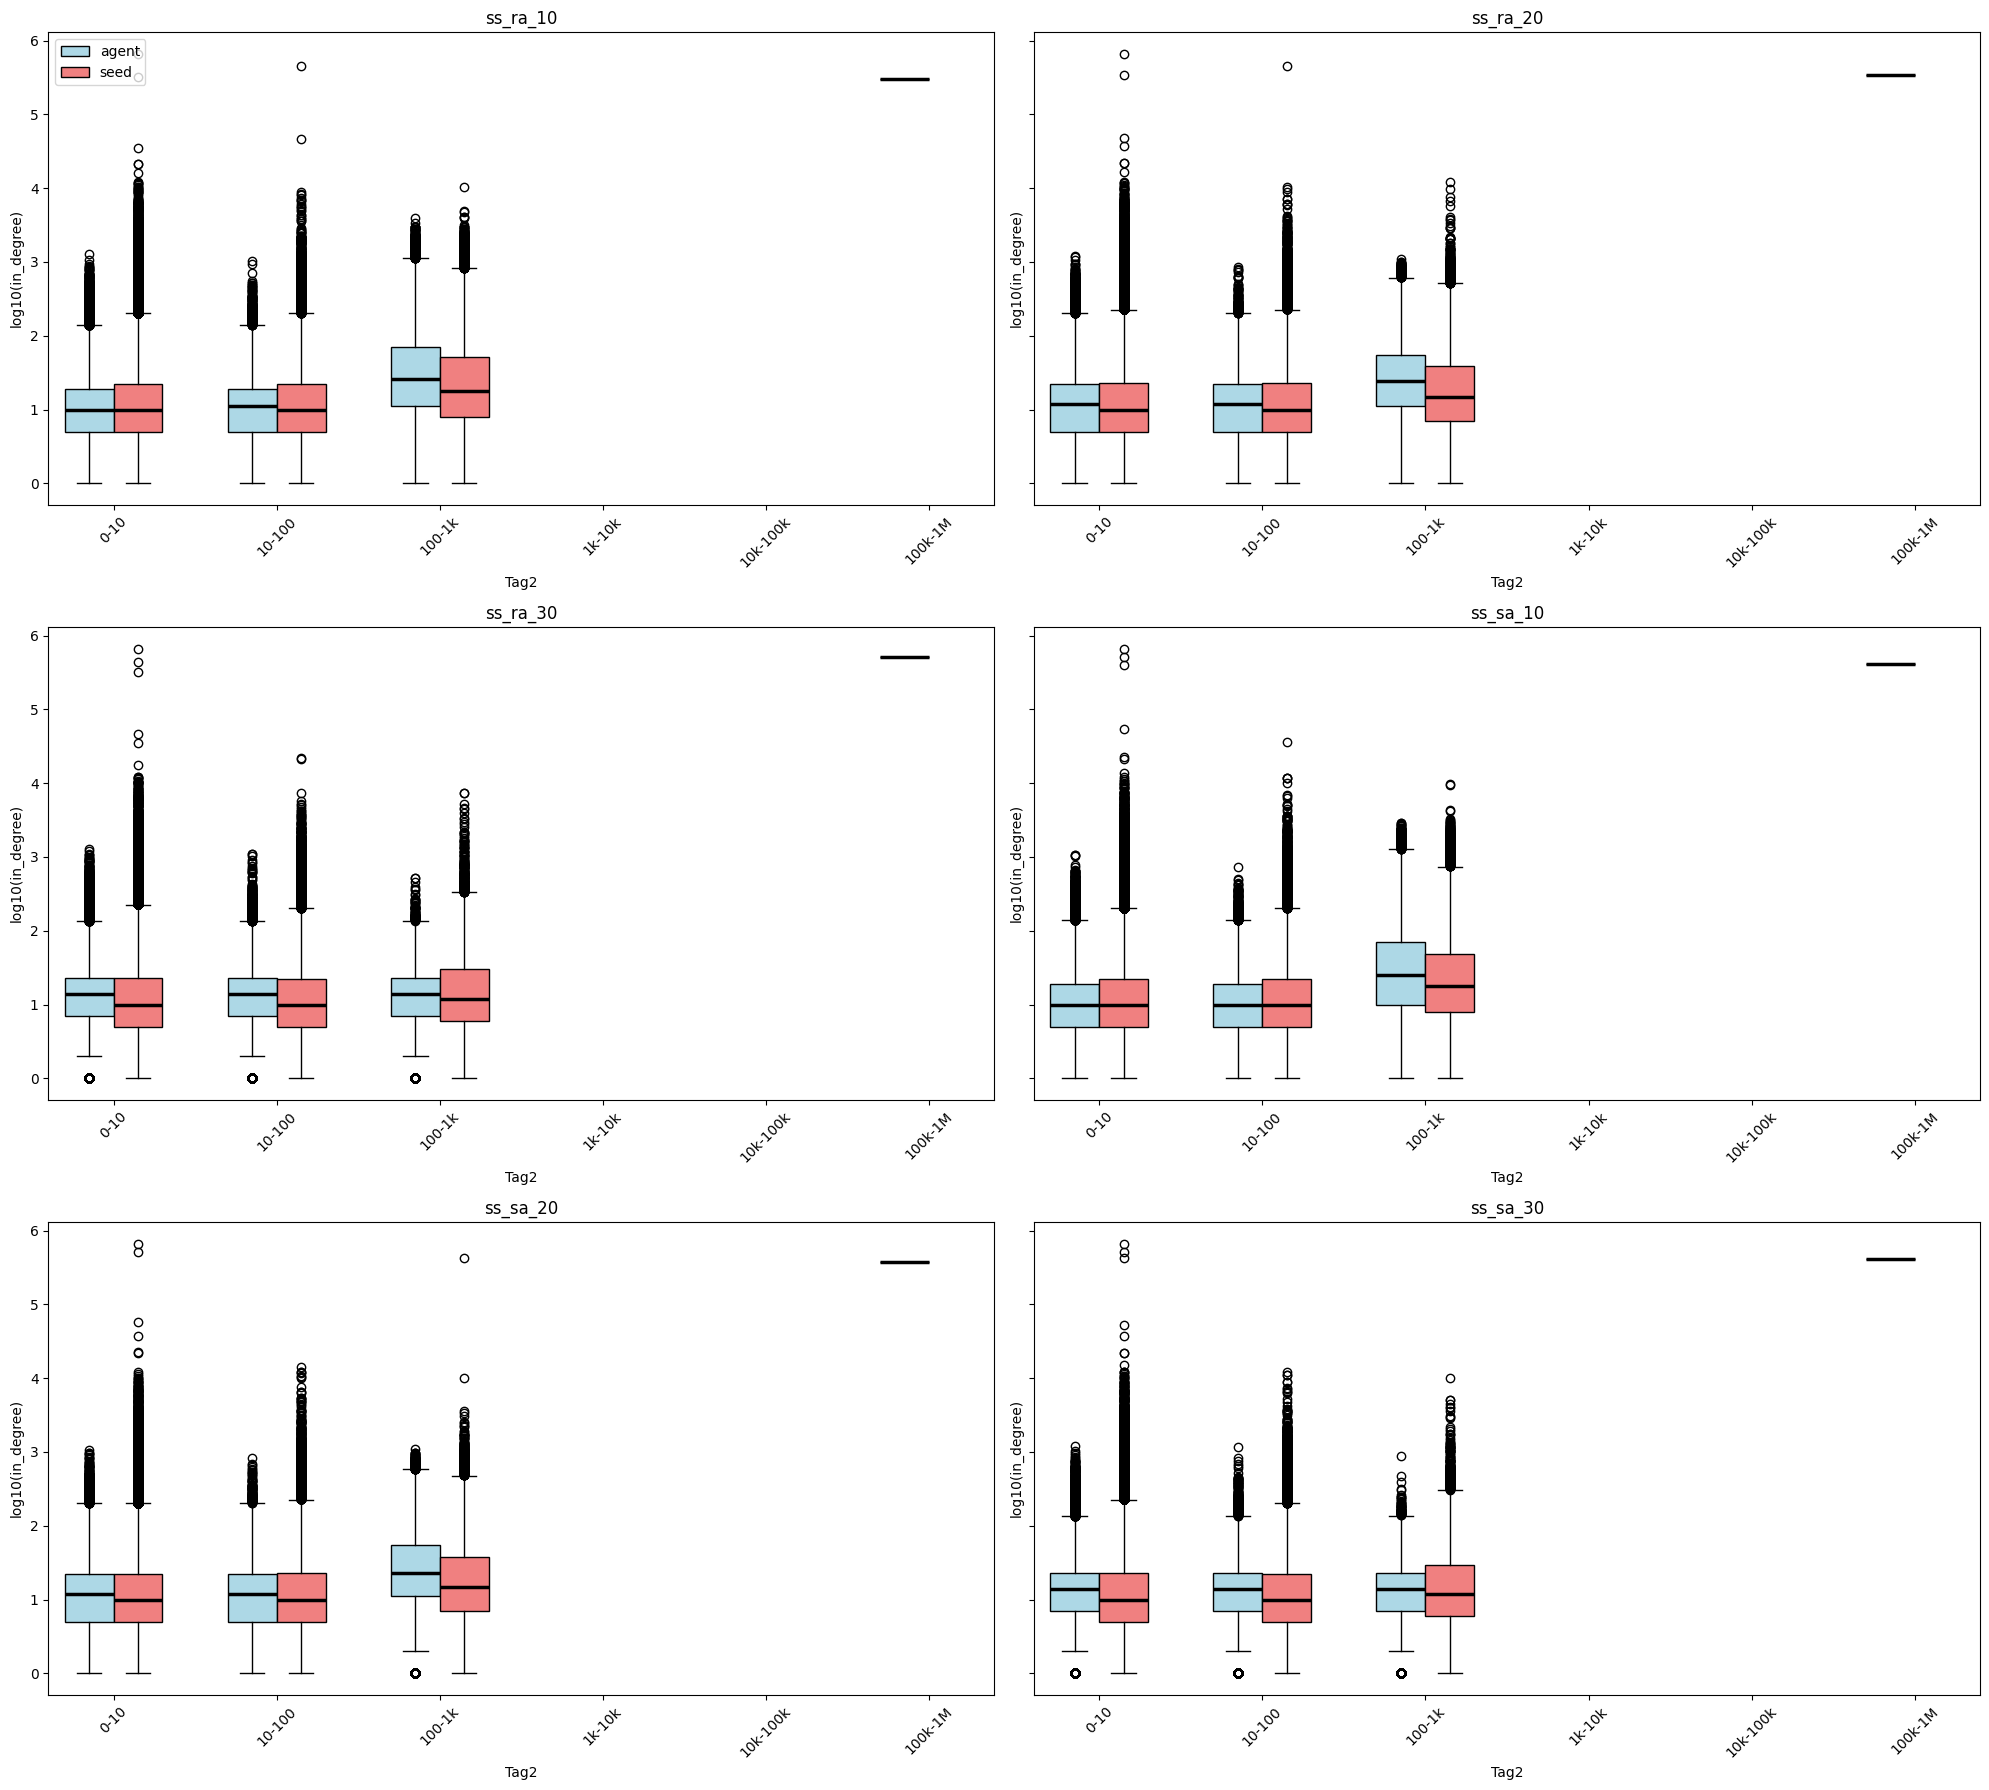

In [8]:
inputs = {
    # 'no_ss_ra': 'data/output_aux/6_17/out_aux_6_17_no_ss_ra.csv',
    # 'ss_ra': 'data/output_aux/6_18/out_aux_6_18_ss_ra.csv',
    # 'no_ss_sa': 'data/output_aux/6_19/out_aux_6_19_no_ss_sa.csv',
    # 'ss_sa': 'data/output_aux/6_19/out_aux_6_19_standard_ss_sa.csv',

    'ss_ra_10': 'data/output_aux/output_ss_ra_10.aux',
    'ss_ra_20': 'data/output_aux/output_ss_ra_20.aux',
    'ss_ra_30': 'data/output_aux/output_ss_ra_30.aux',
    'ss_sa_10': 'data/output_aux/output_ss_sa_10.aux',
    'ss_sa_20': 'data/output_aux/output_ss_sa_20.aux',
    'ss_sa_30': 'data/output_aux/output_ss_sa_30.aux',
}
plot_multiple_experiments_grid(inputs)

/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/wh/v_bs34951bn4252trs3_shlm0000gn/T/ipykernel_91926/862861962.py:15: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


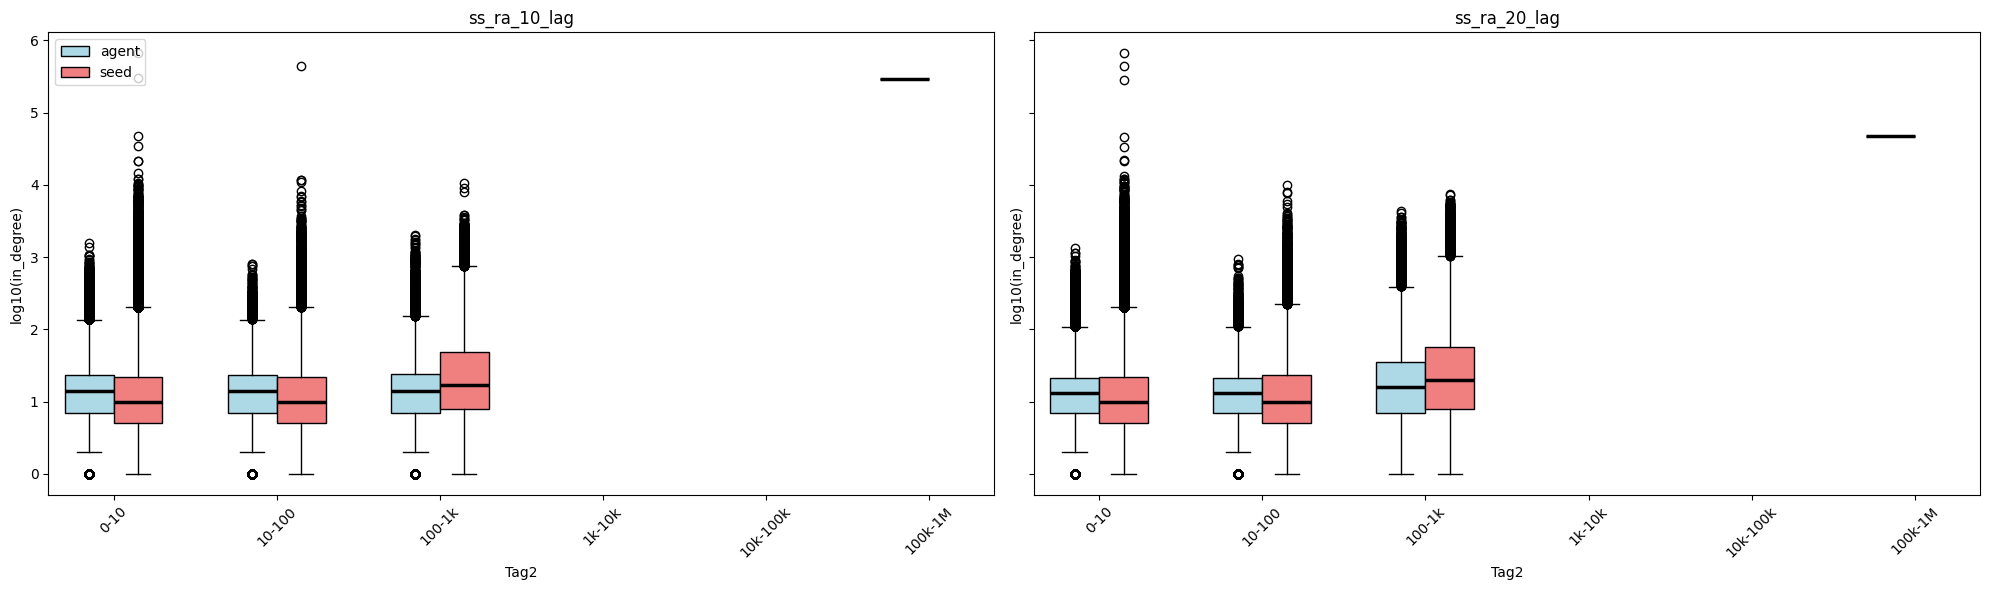

In [9]:
inputs = {
    # 'no_ss_ra': 'data/output_aux/6_17/out_aux_6_17_no_ss_ra.csv',
    # 'ss_ra': 'data/output_aux/6_18/out_aux_6_18_ss_ra.csv',
    # 'no_ss_sa': 'data/output_aux/6_19/out_aux_6_19_no_ss_sa.csv',
    # 'ss_sa': 'data/output_aux/6_19/out_aux_6_19_standard_ss_sa.csv',

    'ss_ra_10_lag': 'data/output_aux/output_ss_ra_10_lag.aux',
    'ss_ra_20_lag': 'data/output_aux/output_ss_ra_20_lag.aux',

}
plot_multiple_experiments_grid(inputs)